# Physical Therapy Exercises dataset
http://dx.doi.org/10.13140/RG.2.2.20101.01768

This notebook is inspired by: 
https://github.com/ML-KULeuven/locomotif/blob/main/physiotherapy-use-case/apply_locomotif_physiotherapy.ipynb

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

from leitmotifs.plotting import *
from leitmotifs.lama import *

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

def znormalize(ts):
    for i in range(3):
        ts[:, 3*i : 3*(i+1)] \
            = ((ts[:, 3*i : 3*(i+1)] - np.mean(ts[:, 3*i : 3*(i+1)], axis=None)) / 
               np.std(ts[:, 3*i : 3*(i+1)], axis=None))
    return ts

In [2]:
df = pd.read_csv("../datasets/physiodata/physio.csv")
df_gt = read_ground_truth("../datasets/physiodata/physio")

df.head()

../datasets/physiodata/physio_gt.csv


,0,1,2,3,4,5,6,7,8,9,...,5516,5517,5518,5519,5520,5521,5522,5523,5524,5525
0,-1.571308,-1.576449,-1.571326,-1.575196,-1.573896,-1.573879,-1.576433,-1.576431,-1.573842,-1.569993,...,-1.582074,-1.592331,-1.601307,-1.587110,-1.579311,-1.568959,-1.580547,-1.576642,-1.581819,-1.596017
1,0.516187,0.520068,0.514885,0.514912,0.517464,0.522579,0.525183,0.522641,0.525182,0.521307,...,0.415030,0.420290,0.429342,0.438162,0.456013,0.464899,0.463742,0.463772,0.470138,0.471493
2,0.008047,0.009324,0.013201,0.014462,0.014488,0.017103,0.011938,0.006760,0.006796,0.006800,...,-0.011739,-0.024689,-0.027279,-0.018080,-0.011452,-0.011316,-0.019155,-0.034611,-0.013960,-0.003735
3,-0.014381,-0.014510,-0.024810,-0.017816,-0.024753,-0.024764,-0.017893,0.006362,0.001147,0.013318,...,-0.074041,-0.018418,0.061702,0.113827,0.070625,-0.019415,-0.090666,-0.076723,-0.033442,0.027229
4,0.022155,0.015588,0.027506,0.036017,0.032546,0.015107,0.004819,0.003075,0.022352,0.029193,...,0.019546,0.017156,0.026165,0.018639,0.021775,0.025155,0.015444,0.001216,0.029207,0.032523


(9, 5526)


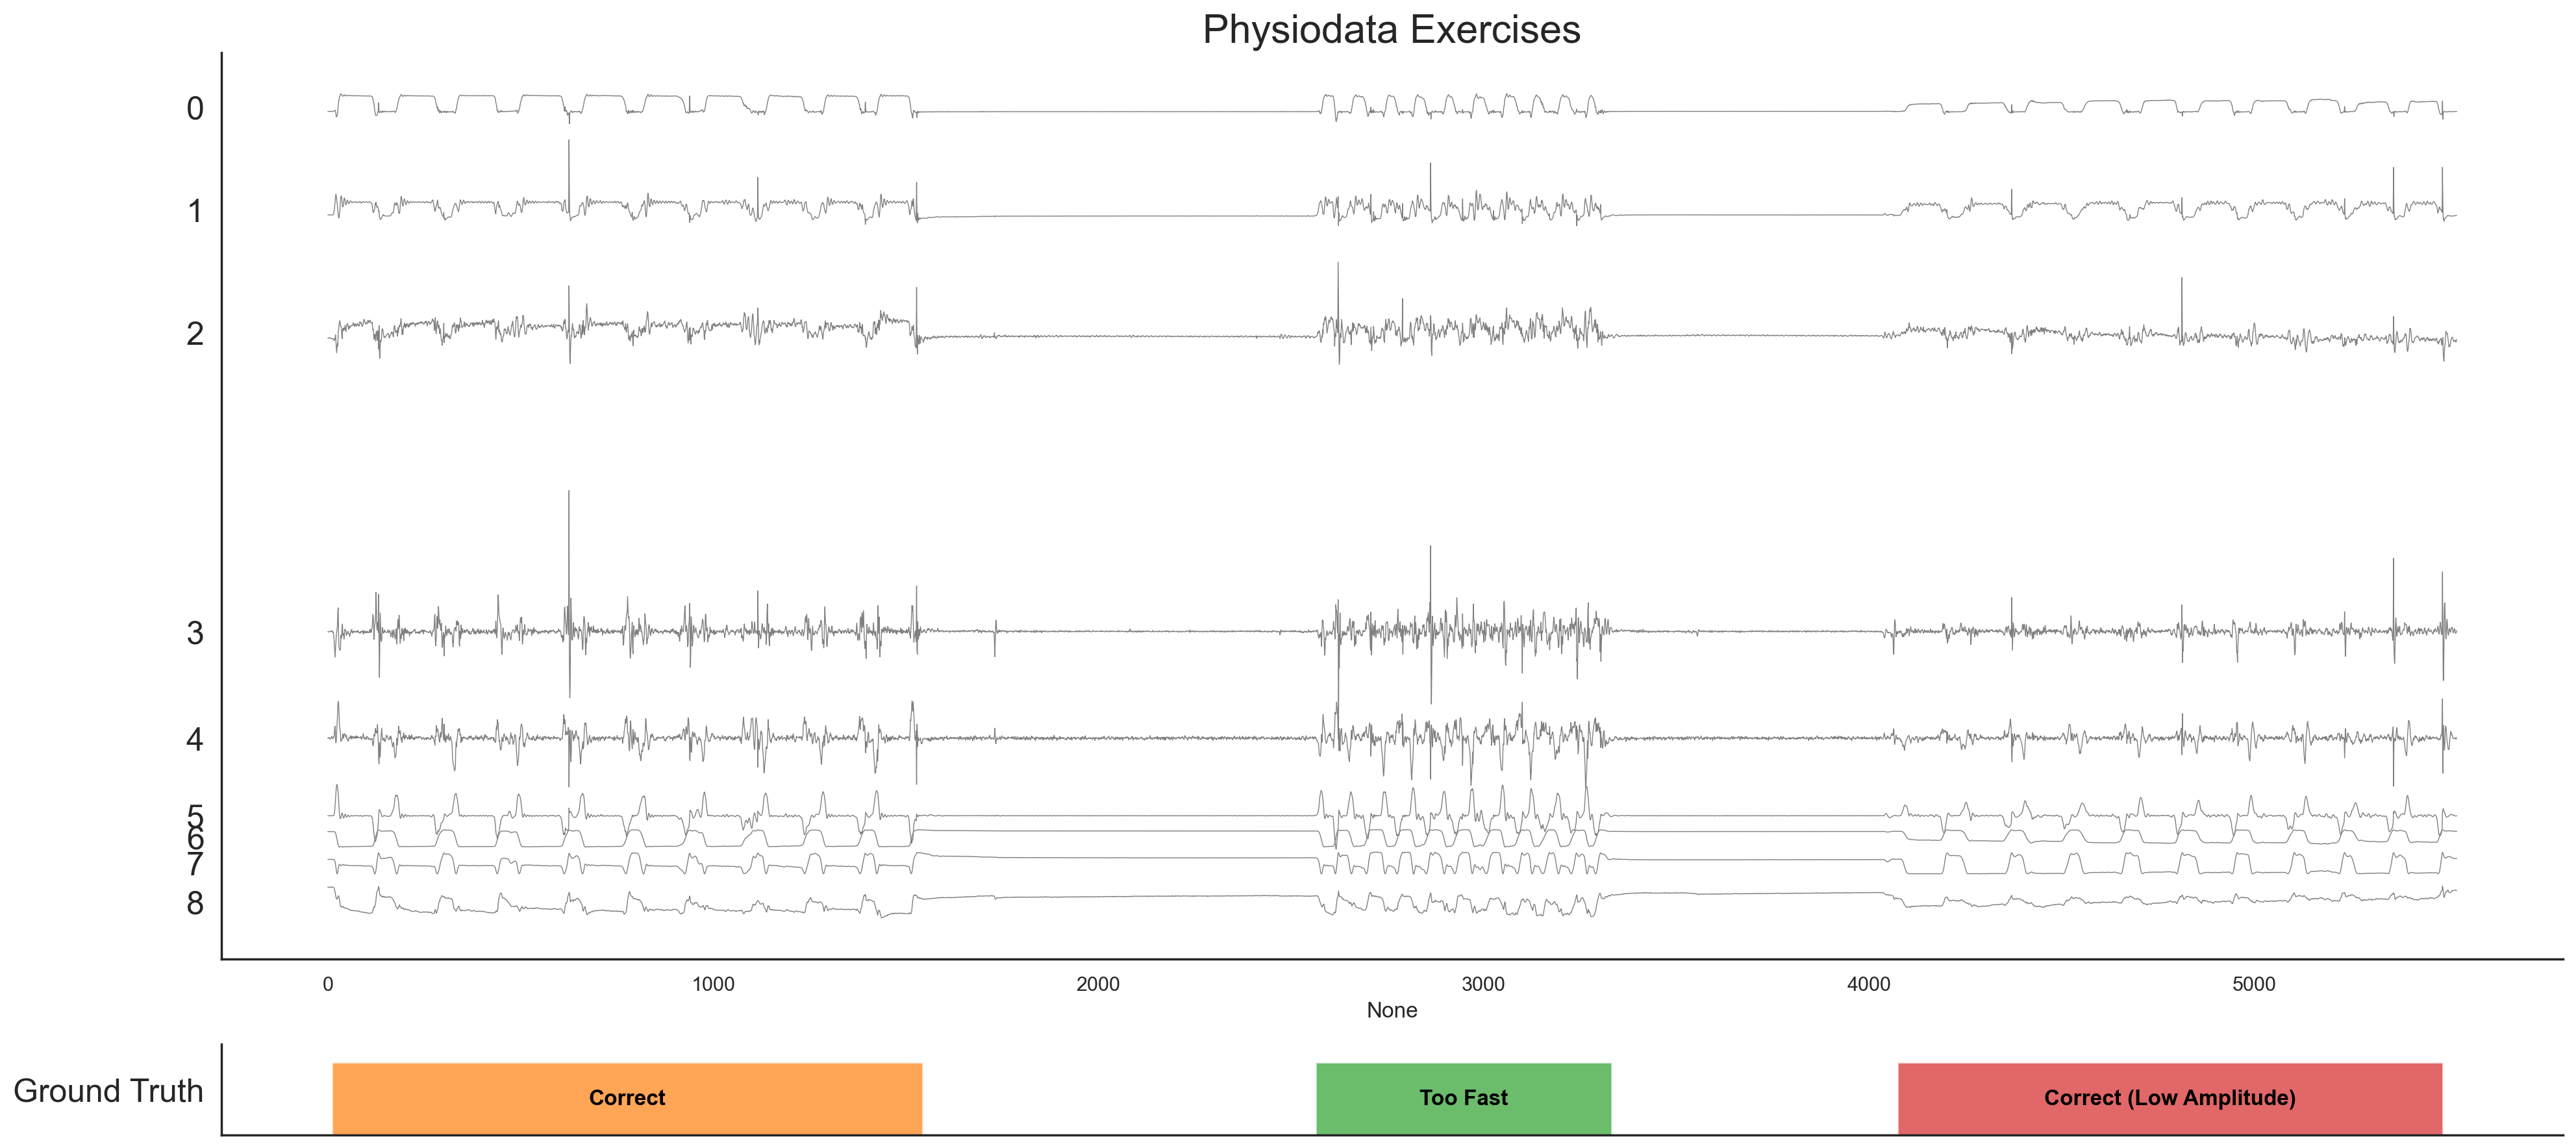

(<Figure size 2000x900 with 2 Axes>,
 array([[<Axes: title={'center': 'Physiodata Exercises'}, xlabel='None'>],
        [<Axes: >]], dtype=object))

In [11]:
# Input Parameters
f = 3          # number of sub-dimensions
k_max = 20     # expected number of repeats

ds_name = "Physiodata Exercises"

series = df

print(series.shape)
# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    ground_truth=df_gt,
    dimension_labels=df.index,
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

ml.plot_dataset()

Data (9, 5526)


Compute ks (22):   0%|          | 0/21 [00:00<?, ?it/s]

Window-size: 160
Elbow Points [10 18]  found in 3.1 s


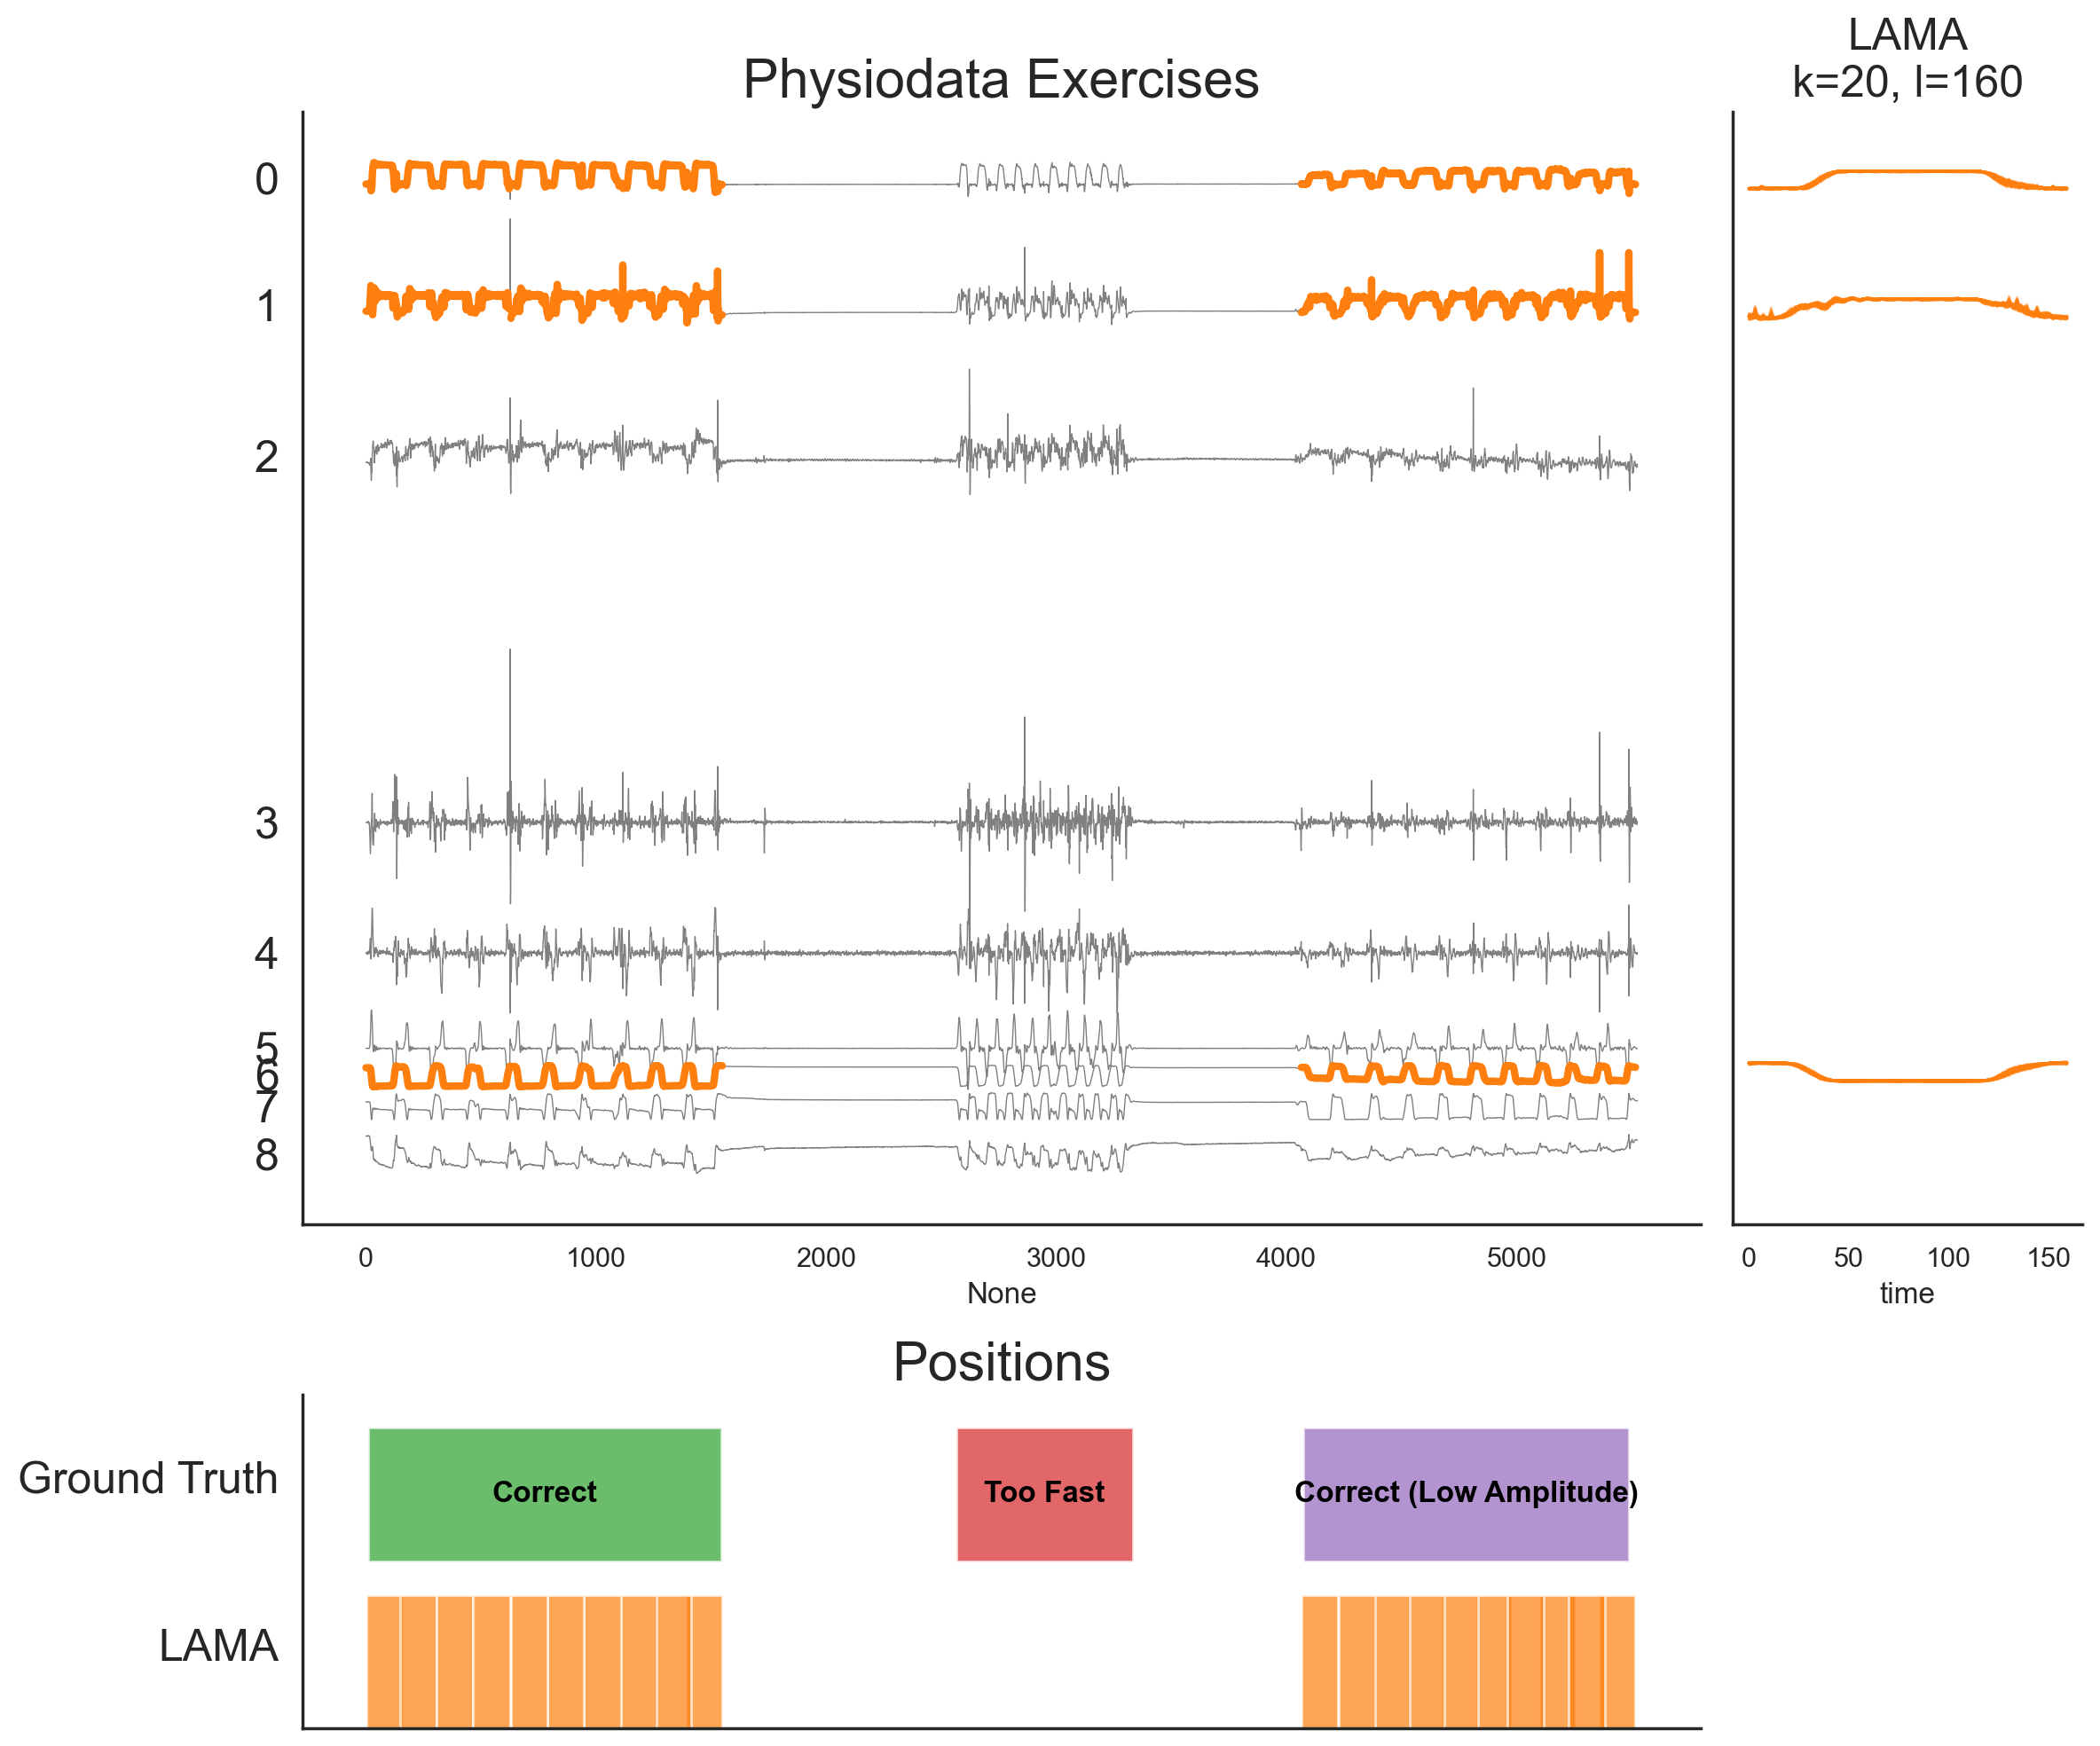

(<Figure size 1200x1000 with 3 Axes>,
 array([[<Axes: title={'center': 'Physiodata Exercises'}, xlabel='None'>,
         <Axes: title={'center': 'LAMA\nk=20, l=160'}, xlabel='time', ylabel='value'>],
        [<Axes: title={'center': 'Positions'}>, <Axes: >]], dtype=object))

In [13]:
dists, motif_sets, elbow_points = ml.fit_k_elbow(
    k_max+2,
    motif_length=motif_length,
    plot_elbows=False,
    plot_motifsets=False)

ml.elbow_points = [k_max]
ml.plot_motifset(motifset_name="LAMA")